Welcome to the Spotify Playlist analyzer! This analyzer takes the info from a <b>public</b> spotify playlist and prints out its cover image as well as the info of the song itself—its name, its artist, the album it belongs to, as well as its metrics. You also have the choice of receiving a song recommendation at the end if you so please.

# Spotify Playlist Analysis Instructions

## Obtaining Spotify Client ID and Client Secret Credentials

To obtain your own client ID and client secret, connect your Spotify account to 
the 'Spotify for Developers' website, which you can find [here](https://developer.spotify.com/dashboard/). 

Once you're on the dashboard, click on create an app—its name and description doesn't matter—you simply need to obtain your client ID and client secret, which will be entered when you are prompted to enter those credentials later in the Setup section.

## Obtaining Playlist URL

Make sure your playlist is **public**!

To find your playlist url, first click on the three dots (...), which can be found next to the play and like buttons: 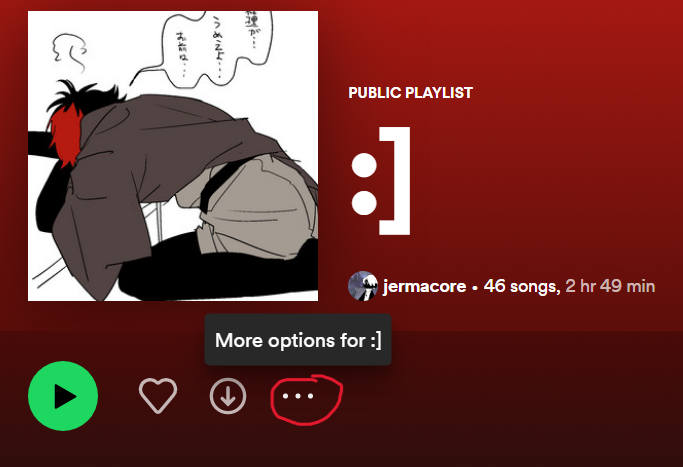
    

From there, click on 'Share,' then 'Copy link to playlist.'
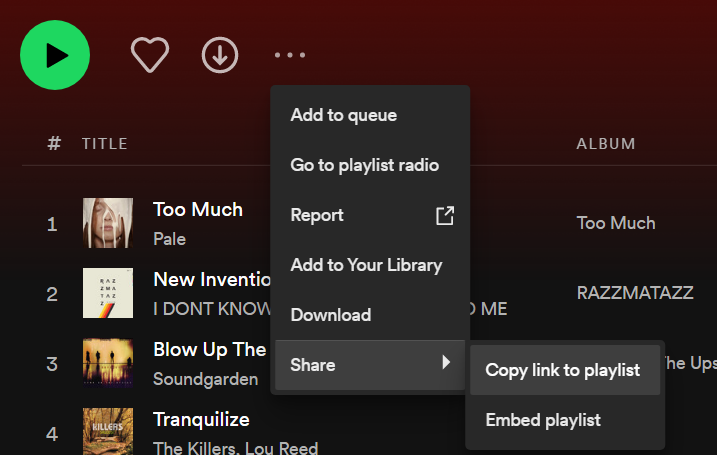

Paste the link into the analyze_playlist() cell under 'Try it Out,' and you'll receive a playlist analysis! (●'◡'●)

# Setup

In [6]:
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
from getpass import getpass 
from IPython.display import Image, display 
from pprint import pprint
from spotipy.exceptions import SpotifyException
import pandas as pd
from statistics import mean
import random
def line():
    print("-------------------------------")

In [7]:
# Authentification w/o user:

SPOTIFY_CLIENT_ID = getpass("Please input the client ID.")
SPOTIFY_CLIENT_SECRET=getpass("Please input the client secret.")

client_credentials_manager = SpotifyClientCredentials(SPOTIFY_CLIENT_ID, SPOTIFY_CLIENT_SECRET)
sp=spotipy.Spotify(client_credentials_manager=client_credentials_manager)

## Analysis Function

In [8]:
def analyze_playlist(url):
    #splitting string technique to extract playlist id
    playlist_url=url.split("https://open.spotify.com/playlist/")[-1]
    
    try:
        playlist_id=playlist_url.split('?si=')[0]
        pl=sp.playlist_items(playlist_id)
    except SpotifyException:
        return("Oops! Invalid input. Please try again.")
    else: print(f"ANALYZING PLAYLIST...")

    playlist_image=sp.playlist_cover_image(playlist_id)

    playlist = pl['items']
    #creating dictionary and keys
    playlist_data={'artist':[], 'artist_id':[], 'album':[], 'track_name':[], 'track_id':[], 'image_url':[]}

    # playlist data extraction
    for track in playlist:
        playlist_data['artist'].append(track['track']['artists'][0]['name'])
        playlist_data['artist_id'].append(track['track']['artists'][0]['uri'])
        playlist_data['album'].append(track['track']['album']['name'])
        playlist_data['track_name'].append(track['track']['name'])
        playlist_data['track_id'].append(track['track']['uri'])
        playlist_data['image_url'].append(track['track']['album']['images'][1]['url'])

    track_info = sp.audio_features(playlist_data['track_id'])

    playlist_df = pd.DataFrame()

    playlist_df['artist']=playlist_data['artist']
    playlist_df['artist_id']=playlist_data['artist_id']
    playlist_df['track_name']=playlist_data['track_name']
    playlist_df['album']=playlist_data['album']
    playlist_df['track_id']=playlist_data['track_id']
    playlist_df['track_info']=track_info
    playlist_df['image_url']=playlist_data['image_url']

    # displaying playlist cover image and number tracks on playlist
    display(Image(url=playlist_image[0]['url'], height=250))
    print(f"NUMBER OF SONGS: {len(playlist_data['track_name'])}")
    
    dance_dance=[]
    energy=[]
    liveness=[]
    tempo=[]
    artist=[]
    track=[]

    line()

    for index, row in playlist_df.iterrows():
    #printing track info
        display(Image(url=row['image_url'], height=200))
        print(f"ARTIST NAME: {row['artist']}\n TRACK NAME: {row['track_name']}\n ALBUM: {row['album']}\n TRACK ID: {row['track_id']}")
        print(f"DANCEABILITY: {row['track_info']['danceability']}")
        print(f"ENERGY: {row['track_info']['energy']}")
        print(f"TEMPO: {row['track_info']['tempo']}")
        line()
    #extracting track audio features
        dance_dance.append(row['track_info']['danceability'])
        energy.append(row['track_info']['energy'])
        tempo.append(row['track_info']['tempo'])
        artist.append(row['artist_id'])
        track.append(row['track_id'])

    #printing specific track audio features
    print(f"AVERAGE DANCEABILITY: {mean(dance_dance)}")
    print(f"AVERAGE ENERGY: {mean(energy)}")
    print(f"AVERAGE TEMPO: {mean(tempo)}")

    line()
    
    # song rec setup
    genres=sp.recommendation_genre_seeds()['genres']
    unwanted_genres = ['acoustic','afrobeat', 'alt-rock', 'ambient','black-metal','bluegrass','blues','bossanova','brazil','breakbeat','british','cantopop','chicago-house',
    'children','chill','classical','club','comedy','country','dance','dancehall','death-metal','deep-house','detroit-techno','disco','disney','drum-and-bass','dub','dubstep',
    'edm','electro','electronic', 'folk','forro','funk','garage','german','gospel','goth','grindcore','groove','grunge','guitar','happy','hard-rock','hardcore','hardstyle',
    'holidays','honky-tonk','idm','indian','industrial','iranian','jazz','kids','latin','latino','malay','mandopop','metal-misc','metalcore','minimal-techno','movies','mpb',
    'new-age','new-release','opera','pagode','party','philippines-opm','piano','pop-film','post-dubstep','power-pop','progressive-house','psych-rock','rainy-day','reggae',
    'reggaeton','road-trip','rockabilly','romance','sad','salsa','samba','sertanejo','show-tunes','ska','sleep','songwriter','soul','soundtracks','spanish','study','summer',
    'swedish','synth-pop','tango','techno','trance','trip-hop','turkish','work-out','world-music'
    ]
    wanted_genres = list(set(genres) - set(unwanted_genres))

    random_artist=random.choice(artist)
    random_track=random.choice(track)
    random_genre=random.choice(wanted_genres)

    rec_rawdata=sp.recommendations(seed_artists=[random_artist], seed_genres=[random_genre], seed_tracks=[random_track], limit=1)['tracks']

    rec=input("Would you like to get a track recommendation? Reply with yes or no only. ").capitalize()
    if rec == 'Yes':
        print(f"GENERATING RANDOM TRACK...")
        for info in rec_rawdata:
            display(Image(url=info['album']['images'][1]['url'], height=200))
            print(f"ARTIST NAME: {info['album']['artists'][0]['name']}")
            print(f"SONG NAME: {info['name']}")
    elif rec=='No':
        print(f"Okay :(")
    else:
        print("Invalid input. Please try again.")
    


# Playlists

## Examples

In [9]:
# I asked friends to send me their public spotify playlists to use for the demo below.

In [10]:
# example of a playlist with an invalid ID:
analyze_playlist('https://open.spotify.com/playlist/74xfJOfNtO7XXIhDfAyM?si=yhfvrXvDQmSk52Q_yDxVFA')

HTTP Error for GET to https://api.spotify.com/v1/playlists/74xfJOfNtO7XXIhDfAyM/tracks with Params: {'limit': 100, 'offset': 0, 'fields': None, 'market': None, 'additional_types': 'track,episode'} returned 404 due to Invalid playlist Id


'Oops! Invalid input. Please try again.'

In [11]:
analyze_playlist('https://open.spotify.com/playlist/74xfJOfNtO4Q7XXIhDfAyM?si=yhfvrXvDQmSk52Q_yDxVFA')

ANALYZING PLAYLIST...


NUMBER OF SONGS: 46
-------------------------------


ARTIST NAME: Pale
 TRACK NAME: Too Much
 ALBUM: Too Much
 TRACK ID: spotify:track:4zKyp3uvR53CfUEKikJsmq
DANCEABILITY: 0.891
ENERGY: 0.358
TEMPO: 108.006
-------------------------------


ARTIST NAME: I DONT KNOW HOW BUT THEY FOUND ME
 TRACK NAME: New Invention
 ALBUM: RAZZMATAZZ
 TRACK ID: spotify:track:5vRXG939KMWdIPdLRYo9kw
DANCEABILITY: 0.489
ENERGY: 0.854
TEMPO: 180.138
-------------------------------


ARTIST NAME: Soundgarden
 TRACK NAME: Blow Up The Outside World
 ALBUM: Down On The Upside
 TRACK ID: spotify:track:5TLA7O0ogTqwZHbS3ERabw
DANCEABILITY: 0.33
ENERGY: 0.529
TEMPO: 140.156
-------------------------------


ARTIST NAME: The Killers
 TRACK NAME: Tranquilize
 ALBUM: Sawdust
 TRACK ID: spotify:track:6Bm3TYTfP6jjxUTE6OdXG3
DANCEABILITY: 0.378
ENERGY: 0.812
TEMPO: 78.057
-------------------------------


ARTIST NAME: Ludo
 TRACK NAME: Drunken Lament
 ALBUM: You're Awful, I Love You
 TRACK ID: spotify:track:5Tq3Hf6i6uzouvd5LwJfiK
DANCEABILITY: 0.356
ENERGY: 0.804
TEMPO: 128.995
-------------------------------


ARTIST NAME: Burn The Ballroom
 TRACK NAME: Kiss Me You Animal
 ALBUM: Kiss Me You Animal
 TRACK ID: spotify:track:3SRngdnXshmXPkqYLBfqiV
DANCEABILITY: 0.466
ENERGY: 0.836
TEMPO: 168.0
-------------------------------


ARTIST NAME: The Hush Sound
 TRACK NAME: Sweet Tangerine
 ALBUM: Like Vines
 TRACK ID: spotify:track:3fMxeVaHO93ENmGJtNwpfm
DANCEABILITY: 0.546
ENERGY: 0.851
TEMPO: 144.007
-------------------------------


ARTIST NAME: Finger Eleven
 TRACK NAME: Paralyzer
 ALBUM: Them Vs. You Vs. Me (Deluxe Edition)
 TRACK ID: spotify:track:28IEbk5a7twNTbUEvWslUb
DANCEABILITY: 0.644
ENERGY: 0.939
TEMPO: 106.031
-------------------------------


ARTIST NAME: Ludo
 TRACK NAME: Elektra's Complex
 ALBUM: Ludo
 TRACK ID: spotify:track:2VQ4NPLPqNawA482SjL7p5
DANCEABILITY: 0.44
ENERGY: 0.89
TEMPO: 154.748
-------------------------------


ARTIST NAME: Ludo
 TRACK NAME: In Space
 ALBUM: You're Awful, I Love You
 TRACK ID: spotify:track:0JDmpJlMFeCYFtHFYA5Zpn
DANCEABILITY: 0.388
ENERGY: 0.906
TEMPO: 165.046
-------------------------------


ARTIST NAME: Fish in a Birdcage
 TRACK NAME: Rule #4 - Fish in a Birdcage
 ALBUM: Fish in a Birdcage
 TRACK ID: spotify:track:3CwIYemTONwWpSZwMAmlu7
DANCEABILITY: 0.838
ENERGY: 0.503
TEMPO: 105.996
-------------------------------


ARTIST NAME: Penelope Scott
 TRACK NAME: Lavender
 ALBUM: The Junkyard 2
 TRACK ID: spotify:track:5cw2Hl30ynYQBOGUc7uRQU
DANCEABILITY: 0.431
ENERGY: 0.409
TEMPO: 80.229
-------------------------------


ARTIST NAME: The Antlers
 TRACK NAME: Putting The Dog To Sleep
 ALBUM: Burst Apart
 TRACK ID: spotify:track:3pUoLeK4j2XHIuuqU8FECt
DANCEABILITY: 0.476
ENERGY: 0.405
TEMPO: 137.019
-------------------------------


ARTIST NAME: Melt-Banana
 TRACK NAME: Zero
 ALBUM: Fetch
 TRACK ID: spotify:track:7ddCej9llJ7YRo1uGvM0uk
DANCEABILITY: 0.41
ENERGY: 0.914
TEMPO: 131.112
-------------------------------


ARTIST NAME: You'll Never Get to Heaven
 TRACK NAME: Exquisite Tension
 ALBUM: Images
 TRACK ID: spotify:track:69T4iEoAPo1MZ2tv8ppUCW
DANCEABILITY: 0.705
ENERGY: 0.275
TEMPO: 132.0
-------------------------------


ARTIST NAME: Cloudeater
 TRACK NAME: Nothing Critical
 ALBUM: Sun and Sidearm
 TRACK ID: spotify:track:1IMnkjyN1qh5QrFyqk2iPj
DANCEABILITY: 0.467
ENERGY: 0.736
TEMPO: 110.002
-------------------------------


ARTIST NAME: Shayfer James
 TRACK NAME: For the Departed
 ALBUM: Counterfeit Arcade
 TRACK ID: spotify:track:5BZp6bbnf3BQ2s9YGkQMpV
DANCEABILITY: 0.591
ENERGY: 0.599
TEMPO: 99.911
-------------------------------


ARTIST NAME: Will Wood
 TRACK NAME: When Somebody Needs You [Song]
 ALBUM: Camp Here & There: Campfire Songs Edition
 TRACK ID: spotify:track:2fa0HfPvOcJ8WqcJgUUZYD
DANCEABILITY: 0.42
ENERGY: 0.333
TEMPO: 169.904
-------------------------------


ARTIST NAME: Muse
 TRACK NAME: Uprising
 ALBUM: The Resistance
 TRACK ID: spotify:track:4VqPOruhp5EdPBeR92t6lQ
DANCEABILITY: 0.602
ENERGY: 0.905
TEMPO: 128.019
-------------------------------


ARTIST NAME: Muse
 TRACK NAME: Unintended
 ALBUM: Showbiz
 TRACK ID: spotify:track:6kyxQuFD38mo4S3urD2Wkw
DANCEABILITY: 0.487
ENERGY: 0.279
TEMPO: 139.362
-------------------------------


ARTIST NAME: Death Cab for Cutie
 TRACK NAME: The Ice Is Getting Thinner
 ALBUM: Narrow Stairs
 TRACK ID: spotify:track:204974mkLcxFNtq6EXLsJx
DANCEABILITY: 0.362
ENERGY: 0.138
TEMPO: 79.425
-------------------------------


ARTIST NAME: Sarah and the Safe Word
 TRACK NAME: Sick On Seventh Street
 ALBUM: Good Gracious! Bad People.
 TRACK ID: spotify:track:3vO0kLVEB9zatBcVdSRkPh
DANCEABILITY: 0.68
ENERGY: 0.557
TEMPO: 120.033
-------------------------------


ARTIST NAME: Sarah and the Safe Word
 TRACK NAME: Bottom of a Bender
 ALBUM: Good Gracious! Bad People.
 TRACK ID: spotify:track:6FWZBBsK2q1PJBwRJ4SiyD
DANCEABILITY: 0.566
ENERGY: 0.916
TEMPO: 97.979
-------------------------------


ARTIST NAME: angelus
 TRACK NAME: gossip girls
 ALBUM: drama queen
 TRACK ID: spotify:track:4tIGK5G9hNDA50ZdGioZRG
DANCEABILITY: 0.601
ENERGY: 0.671
TEMPO: 172.194
-------------------------------


ARTIST NAME: (K)NoW_NAME
 TRACK NAME: 404
 ALBUM: TVアニメ「ドロヘドロ」EDテーマソングアルバム「混沌の中で踊れ」
 TRACK ID: spotify:track:1bzSaIYDovpBxTEjKw24ae
DANCEABILITY: 0.554
ENERGY: 0.903
TEMPO: 154.93
-------------------------------


ARTIST NAME: Amigo the Devil
 TRACK NAME: Hell and You
 ALBUM: Volume 1
 TRACK ID: spotify:track:3banchOoe2giyRK0jaO1c7
DANCEABILITY: 0.718
ENERGY: 0.327
TEMPO: 82.582
-------------------------------


ARTIST NAME: vivivivivi
 TRACK NAME: credits song for my death
 ALBUM: IN MY HEAD
 TRACK ID: spotify:track:7kgvwGbyXl2xnv7LwyLNIX
DANCEABILITY: 0.249
ENERGY: 0.434
TEMPO: 139.951
-------------------------------


ARTIST NAME: Tennis
 TRACK NAME: 10 Minutes 10 Years
 ALBUM: Yours Conditionally
 TRACK ID: spotify:track:0nNsRe1TI9L5B6Fa9jfV9l
DANCEABILITY: 0.533
ENERGY: 0.547
TEMPO: 182.953
-------------------------------


ARTIST NAME: Fujii Kaze
 TRACK NAME: 死ぬのがいいわ
 ALBUM: HELP EVER HURT NEVER
 TRACK ID: spotify:track:0HYAsQwJIO6FLqpyTeD3l6
DANCEABILITY: 0.6
ENERGY: 0.76
TEMPO: 158.075
-------------------------------


ARTIST NAME: Aly & AJ
 TRACK NAME: Potential Breakup Song
 ALBUM: Potential Breakup Song
 TRACK ID: spotify:track:2ieu0FHqTpBUrMoCFVL3cb
DANCEABILITY: 0.554
ENERGY: 0.899
TEMPO: 157.995
-------------------------------


ARTIST NAME: Destroy Boys
 TRACK NAME: Crybaby
 ALBUM: Make Room
 TRACK ID: spotify:track:61a0LXQA7wJ64CGzttDaN9
DANCEABILITY: 0.416
ENERGY: 0.944
TEMPO: 97.018
-------------------------------


ARTIST NAME: The Brobecks
 TRACK NAME: Better Than Me
 ALBUM: Violent Things
 TRACK ID: spotify:track:2ACs0dJwkSsvNZvEbvFurK
DANCEABILITY: 0.378
ENERGY: 0.665
TEMPO: 169.981
-------------------------------


ARTIST NAME: The Brobecks
 TRACK NAME: Visitation Of The Ghost
 ALBUM: Violent Things
 TRACK ID: spotify:track:0UspsjF4bHzpQdvHvKM3hV
DANCEABILITY: 0.609
ENERGY: 0.772
TEMPO: 94.0
-------------------------------


ARTIST NAME: LOOΠΔ / ODD EYE CIRCLE
 TRACK NAME: LOONATIC
 ALBUM: Max & Match
 TRACK ID: spotify:track:2FwFu6y1aXPWXWcD9RxA6v
DANCEABILITY: 0.488
ENERGY: 0.886
TEMPO: 150.027
-------------------------------


ARTIST NAME: Nothing But Thieves
 TRACK NAME: You Know Me Too Well
 ALBUM: What Did You Think When You Made Me This Way?
 TRACK ID: spotify:track:1BpmL4NBhX2P7GxuoVtojI
DANCEABILITY: 0.605
ENERGY: 0.688
TEMPO: 135.931
-------------------------------


ARTIST NAME: Two Door Cinema Club
 TRACK NAME: Sucker
 ALBUM: Gameshow (Deluxe Edition)
 TRACK ID: spotify:track:2U0c2cYFiPjgaTV8uSaO3C
DANCEABILITY: 0.541
ENERGY: 0.555
TEMPO: 149.806
-------------------------------


ARTIST NAME: Annie
 TRACK NAME: Songs Remind Me of You
 ALBUM: Don't Stop
 TRACK ID: spotify:track:5Rzm48pp208PXeYc6GpUUX
DANCEABILITY: 0.498
ENERGY: 0.954
TEMPO: 128.034
-------------------------------


ARTIST NAME: Kevin Rudolf
 TRACK NAME: She Can Get It
 ALBUM: In The City
 TRACK ID: spotify:track:4p25jHEIqtveVYcimXgJK4
DANCEABILITY: 0.654
ENERGY: 0.935
TEMPO: 114.065
-------------------------------


ARTIST NAME: The Hoosiers
 TRACK NAME: Up To No Good
 ALBUM: The Secret Service
 TRACK ID: spotify:track:0CS8pfaruqU1ykgmwLteRb
DANCEABILITY: 0.682
ENERGY: 0.699
TEMPO: 95.994
-------------------------------


ARTIST NAME: Hollywood Undead
 TRACK NAME: Everywhere I Go
 ALBUM: Swan Songs
 TRACK ID: spotify:track:1czaCgWLWgqp0eRIZ0BcXh
DANCEABILITY: 0.82
ENERGY: 0.831
TEMPO: 110.048
-------------------------------


ARTIST NAME: flumpool
 TRACK NAME: Yoru Wa Nemurerukai?
 ALBUM: EGG
 TRACK ID: spotify:track:57zNLdfimYnWFXbkgWRRlq
DANCEABILITY: 0.552
ENERGY: 0.802
TEMPO: 130.001
-------------------------------


ARTIST NAME: Mars Argo
 TRACK NAME: Angry
 ALBUM: Angry
 TRACK ID: spotify:track:1MTGMRuQSzwILHKDpcIdeL
DANCEABILITY: 0.372
ENERGY: 0.511
TEMPO: 175.8
-------------------------------


ARTIST NAME: Jazmin Bean
 TRACK NAME: Saccharine
 ALBUM: Worldwide Torture
 TRACK ID: spotify:track:0xLCawHAfE3tqlPWRvhT49
DANCEABILITY: 0.425
ENERGY: 0.785
TEMPO: 143.903
-------------------------------


ARTIST NAME: Joe Hawley
 TRACK NAME: Rotary Park
 ALBUM: Joe Hawley Joe Hawley
 TRACK ID: spotify:track:7m5Nqa22UK4SaqvJlSVvB4
DANCEABILITY: 0.417
ENERGY: 0.581
TEMPO: 180.092
-------------------------------


ARTIST NAME: The Antlers
 TRACK NAME: Epilogue
 ALBUM: Hospice
 TRACK ID: spotify:track:31GYrhUN3QIPlWAfUpeF2G
DANCEABILITY: 0.607
ENERGY: 0.151
TEMPO: 141.968
-------------------------------


ARTIST NAME: I DONT KNOW HOW BUT THEY FOUND ME
 TRACK NAME: Razzmatazz
 ALBUM: RAZZMATAZZ
 TRACK ID: spotify:track:3UhhRDkHWz7D28BkejHzqI
DANCEABILITY: 0.397
ENERGY: 0.675
TEMPO: 155.032
-------------------------------
AVERAGE DANCEABILITY: 0.526804347826087
AVERAGE ENERGY: 0.6678913043478261
AVERAGE TEMPO: 133.1425
-------------------------------
GENERATING RANDOM TRACK...


ARTIST NAME: The Cranberries
SONG NAME: Zombie


In [12]:
analyze_playlist('https://open.spotify.com/playlist/25z1fZHQxRnlxxEnIfzA6T?si=zqWU-UsNSaGrtVbJWVGKxg')

ANALYZING PLAYLIST...


NUMBER OF SONGS: 84
-------------------------------


ARTIST NAME: bôa
 TRACK NAME: Twilight
 ALBUM: Twilight
 TRACK ID: spotify:track:065mWeAFcIWOX52Cnj9f6M
DANCEABILITY: 0.386
ENERGY: 0.828
TEMPO: 187.087
-------------------------------


ARTIST NAME: The Smashing Pumpkins
 TRACK NAME: Bullet With Butterfly Wings - Remastered 2012
 ALBUM: Mellon Collie And The Infinite Sadness (Deluxe Edition)
 TRACK ID: spotify:track:6GtX0jaNL8IjVQfrDBx81z
DANCEABILITY: 0.404
ENERGY: 0.72
TEMPO: 121.864
-------------------------------


ARTIST NAME: The Smashing Pumpkins
 TRACK NAME: Today - 2011 Remaster
 ALBUM: Siamese Dream (Deluxe Edition)
 TRACK ID: spotify:track:0u5aO1GYsIhAWCPuXdwnak
DANCEABILITY: 0.456
ENERGY: 0.826
TEMPO: 82.539
-------------------------------


ARTIST NAME: Doll Skin
 TRACK NAME: Mark My Words
 ALBUM: Love Is Dead And We Killed Her
 TRACK ID: spotify:track:4OCNwrFRaRb9OgBpcGmk2n
DANCEABILITY: 0.468
ENERGY: 0.873
TEMPO: 172.06
-------------------------------


ARTIST NAME: Paramore
 TRACK NAME: Decode
 ALBUM: Decode
 TRACK ID: spotify:track:1ZLtE9tSJdaUiIJ9YoKHQe
DANCEABILITY: 0.28
ENERGY: 0.87
TEMPO: 164.057
-------------------------------


ARTIST NAME: Madmans Esprit
 TRACK NAME: Suicidol
 ALBUM: Suicidol
 TRACK ID: spotify:track:5sPxFoYISuMFO47972LEhN
DANCEABILITY: 0.304
ENERGY: 0.929
TEMPO: 91.719
-------------------------------


ARTIST NAME: Oingo Boingo
 TRACK NAME: No One Lives Forever
 ALBUM: Dead Man's Party
 TRACK ID: spotify:track:3kdSHY9ZQIjyg4Q68YG4Qz
DANCEABILITY: 0.588
ENERGY: 0.9
TEMPO: 142.094
-------------------------------


ARTIST NAME: julie
 TRACK NAME: starjump
 ALBUM: starjump/kit
 TRACK ID: spotify:track:3K9ZgSIOJtfpeIIHbcz8bJ
DANCEABILITY: 0.396
ENERGY: 0.702
TEMPO: 118.799
-------------------------------


ARTIST NAME: bôa
 TRACK NAME: Duvet
 ALBUM: Twilight
 TRACK ID: spotify:track:7urtwZEtOypb3r8HNi42dT
DANCEABILITY: 0.584
ENERGY: 0.888
TEMPO: 93.211
-------------------------------


ARTIST NAME: Paramore
 TRACK NAME: All I Wanted
 ALBUM: Brand New Eyes
 TRACK ID: spotify:track:1Bv3h7Vc4AaYA2BcSM3rVd
DANCEABILITY: 0.494
ENERGY: 0.723
TEMPO: 144.036
-------------------------------


ARTIST NAME: Newgrounds Death Rugby
 TRACK NAME: D & D Is Gay (But So Am I So This Tracks)
 ALBUM: D & D Is Gay (But So Am I So This Tracks)
 TRACK ID: spotify:track:1hIKHM0E3XQYXHqBzVwRgs
DANCEABILITY: 0.47
ENERGY: 0.241
TEMPO: 117.298
-------------------------------


ARTIST NAME: Nirvana
 TRACK NAME: Dumb
 ALBUM: In Utero - 20th Anniversary Remaster
 TRACK ID: spotify:track:5gRcv46AMTrosmTOqrOV3Q
DANCEABILITY: 0.697
ENERGY: 0.395
TEMPO: 113.589
-------------------------------


ARTIST NAME: I Monster
 TRACK NAME: Who Is She ?
 ALBUM: Neveroddoreven
 TRACK ID: spotify:track:6AdgGDGbdRMoCVkGye11Zw
DANCEABILITY: 0.396
ENERGY: 0.801
TEMPO: 152.701
-------------------------------


ARTIST NAME: Harley Poe
 TRACK NAME: I Can't Stand Myself
 ALBUM: Lost and Losing It
 TRACK ID: spotify:track:53BA0ZcWvgJZxGyjo7ahJQ
DANCEABILITY: 0.455
ENERGY: 0.886
TEMPO: 104.201
-------------------------------


ARTIST NAME: Adore Delano
 TRACK NAME: 27 Club
 ALBUM: Whatever
 TRACK ID: spotify:track:4r2EFrrF8rnT474a0WyZA6
DANCEABILITY: 0.659
ENERGY: 0.575
TEMPO: 125.019
-------------------------------


ARTIST NAME: She Wants Revenge
 TRACK NAME: Rachael
 ALBUM: This Is Forever
 TRACK ID: spotify:track:7j9QFIS7ztl94fCqMiYTDz
DANCEABILITY: 0.512
ENERGY: 0.832
TEMPO: 153.954
-------------------------------


ARTIST NAME: julie
 TRACK NAME: flutter
 ALBUM: flutter
 TRACK ID: spotify:track:1D8sCqR7SwxUTwUDqMyUAp
DANCEABILITY: 0.173
ENERGY: 0.694
TEMPO: 116.088
-------------------------------


ARTIST NAME: Hole
 TRACK NAME: Jennifer's Body
 ALBUM: Live Through This
 TRACK ID: spotify:track:6wAdJF85cna96BwQn2Pg8c
DANCEABILITY: 0.401
ENERGY: 0.863
TEMPO: 81.65
-------------------------------


ARTIST NAME: The Oozes
 TRACK NAME: Blah Blah Blah
 ALBUM: Blah Blah Blah
 TRACK ID: spotify:track:5R4OMPuKD1yshMdbk8ibnS
DANCEABILITY: 0.416
ENERGY: 0.704
TEMPO: 89.946
-------------------------------


ARTIST NAME: Mitski
 TRACK NAME: Drunk Walk Home
 ALBUM: Bury Me At Makeout Creek
 TRACK ID: spotify:track:0r7UEhhOH1DJQYVPJ1NwOQ
DANCEABILITY: 0.331
ENERGY: 0.358
TEMPO: 172.652
-------------------------------


ARTIST NAME: Slothrust
 TRACK NAME: Happy Together
 ALBUM: Show Me How You Want It to Be
 TRACK ID: spotify:track:4kG8ckeo4wKsHx4Xk988GE
DANCEABILITY: 0.327
ENERGY: 0.727
TEMPO: 142.659
-------------------------------


ARTIST NAME: The Smashing Pumpkins
 TRACK NAME: Silverfuck - Remastered
 ALBUM: Siamese Dream (Deluxe Edition)
 TRACK ID: spotify:track:6qzPIHZ3iujtOYjNkA5CL3
DANCEABILITY: 0.294
ENERGY: 0.46
TEMPO: 126.717
-------------------------------


ARTIST NAME: The Smashing Pumpkins
 TRACK NAME: Cherub Rock - Remastered 2011
 ALBUM: Siamese Dream (2011 - Remaster)
 TRACK ID: spotify:track:0F2LiyHp9E0pAanpfnzHNp
DANCEABILITY: 0.371
ENERGY: 0.866
TEMPO: 87.254
-------------------------------


ARTIST NAME: Deftones
 TRACK NAME: Minerva
 ALBUM: Deftones
 TRACK ID: spotify:track:1gzWd0ILFaCoHUfQSkCIvl
DANCEABILITY: 0.349
ENERGY: 0.934
TEMPO: 124.055
-------------------------------


ARTIST NAME: Deftones
 TRACK NAME: Passenger
 ALBUM: White Pony
 TRACK ID: spotify:track:7IoK6jZBxY7NMoQPoPXZCF
DANCEABILITY: 0.345
ENERGY: 0.797
TEMPO: 117.987
-------------------------------


ARTIST NAME: Deftones
 TRACK NAME: Cherry Waves
 ALBUM: Saturday Night Wrist
 TRACK ID: spotify:track:08cyos23nutQ1qnejI7R4B
DANCEABILITY: 0.47
ENERGY: 0.859
TEMPO: 124.01
-------------------------------


ARTIST NAME: Deftones
 TRACK NAME: Knife Prty
 ALBUM: White Pony
 TRACK ID: spotify:track:42Kv1RoTAm09FeytxiuZIB
DANCEABILITY: 0.295
ENERGY: 0.883
TEMPO: 74.483
-------------------------------


ARTIST NAME: Deftones
 TRACK NAME: Ceremony
 ALBUM: Ohms
 TRACK ID: spotify:track:2X5SHv5ubRTNIgMxxCPYdo
DANCEABILITY: 0.281
ENERGY: 0.665
TEMPO: 147.122
-------------------------------


ARTIST NAME: Deftones
 TRACK NAME: Beware
 ALBUM: Saturday Night Wrist
 TRACK ID: spotify:track:2Bo3qOzyUyxx62NZXthhzM
DANCEABILITY: 0.265
ENERGY: 0.714
TEMPO: 145.156
-------------------------------


ARTIST NAME: Mitski
 TRACK NAME: Liquid Smooth
 ALBUM: Lush
 TRACK ID: spotify:track:3UChNf9rb9hJZvOcU9HCTb
DANCEABILITY: 0.356
ENERGY: 0.342
TEMPO: 113.52
-------------------------------


ARTIST NAME: Deftones
 TRACK NAME: Mascara
 ALBUM: Around the Fur
 TRACK ID: spotify:track:4cLdpErILMO8Db8pQVAVcZ
DANCEABILITY: 0.472
ENERGY: 0.446
TEMPO: 77.562
-------------------------------


ARTIST NAME: my bloody valentine
 TRACK NAME: When You Sleep
 ALBUM: Loveless
 TRACK ID: spotify:track:3HfEgAaf0koxBpBB8NvGda
DANCEABILITY: 0.4
ENERGY: 0.82
TEMPO: 128.894
-------------------------------


ARTIST NAME: Kittie
 TRACK NAME: Do You Think I'm a Whore?
 ALBUM: Spit
 TRACK ID: spotify:track:5aC8oD7sCinWSLO1xFJ9H8
DANCEABILITY: 0.586
ENERGY: 0.807
TEMPO: 156.982
-------------------------------


ARTIST NAME: Kittie
 TRACK NAME: Brackish
 ALBUM: Spit
 TRACK ID: spotify:track:6lqwRfIHYRiJ7M9xfLqcRx
DANCEABILITY: 0.349
ENERGY: 0.931
TEMPO: 142.956
-------------------------------


ARTIST NAME: Nirvana
 TRACK NAME: Drain You
 ALBUM: Nevermind (Remastered)
 TRACK ID: spotify:track:5Ddlk6C2JVxb1SReZ6O1wk
DANCEABILITY: 0.325
ENERGY: 0.929
TEMPO: 133.358
-------------------------------


ARTIST NAME: Subhumans
 TRACK NAME: No
 ALBUM: The Day the Country Died
 TRACK ID: spotify:track:6Got3kDpFVc9XysaKhaWrK
DANCEABILITY: 0.475
ENERGY: 0.703
TEMPO: 91.057
-------------------------------


ARTIST NAME: Narrow Head
 TRACK NAME: Ashtray
 ALBUM: Satisfaction
 TRACK ID: spotify:track:1AmVWLPhCqTMt4y5t0cB8T
DANCEABILITY: 0.289
ENERGY: 0.741
TEMPO: 132.222
-------------------------------


ARTIST NAME: Bikini Kill
 TRACK NAME: Carnival
 ALBUM: The First Two Records
 TRACK ID: spotify:track:7nvr4fAv279XAQ7flKOiuT
DANCEABILITY: 0.221
ENERGY: 0.873
TEMPO: 182.101
-------------------------------


ARTIST NAME: Have A Nice Life
 TRACK NAME: Holy Fucking Shit: 40,000
 ALBUM: Deathconsciousness
 TRACK ID: spotify:track:0oPnyCLqcn2ZNzwy5pLKDR
DANCEABILITY: 0.427
ENERGY: 0.388
TEMPO: 122.274
-------------------------------


ARTIST NAME: Nirvana
 TRACK NAME: Love Buzz
 ALBUM: Bleach
 TRACK ID: spotify:track:5muVpPu8Fj9fXfDbbqDdrZ
DANCEABILITY: 0.479
ENERGY: 0.865
TEMPO: 137.902
-------------------------------


ARTIST NAME: Deftones
 TRACK NAME: Digital Bath
 ALBUM: White Pony
 TRACK ID: spotify:track:2jSJm3Gv6GLxduWLenmjKS
DANCEABILITY: 0.338
ENERGY: 0.859
TEMPO: 92.966
-------------------------------


ARTIST NAME: She Wants Revenge
 TRACK NAME: Red Flags And Long Nights
 ALBUM: She Wants Revenge
 TRACK ID: spotify:track:5e0vfjC19908HLerbfbEkv
DANCEABILITY: 0.627
ENERGY: 0.543
TEMPO: 143.232
-------------------------------


ARTIST NAME: Basement
 TRACK NAME: Covet
 ALBUM: Colourmeinkindness
 TRACK ID: spotify:track:2QX8qX86UDeGNJfcd2Yisy
DANCEABILITY: 0.429
ENERGY: 0.798
TEMPO: 139.061
-------------------------------


ARTIST NAME: Eyedress
 TRACK NAME: Separation Anxiety
 ALBUM: Manila Ice
 TRACK ID: spotify:track:0RNGGyNM2yWfuTZ9sBz7wg
DANCEABILITY: 0.424
ENERGY: 0.761
TEMPO: 164.113
-------------------------------


ARTIST NAME: Siouxsie and the Banshees
 TRACK NAME: Monitor
 ALBUM: Juju
 TRACK ID: spotify:track:1gnZ2VCdVUHSgiBKrzdeK8
DANCEABILITY: 0.461
ENERGY: 0.836
TEMPO: 95.84
-------------------------------


ARTIST NAME: Remo Drive
 TRACK NAME: Yer Killin' Me
 ALBUM: Greatest Hits
 TRACK ID: spotify:track:79lzbYqczF4oLoOkxx9mHK
DANCEABILITY: 0.396
ENERGY: 0.718
TEMPO: 165.272
-------------------------------


ARTIST NAME: Have A Nice Life
 TRACK NAME: Earthmover
 ALBUM: Deathconsciousness
 TRACK ID: spotify:track:77yGZRjuWfSzbDT0ROSSUG
DANCEABILITY: 0.347
ENERGY: 0.557
TEMPO: 120.024
-------------------------------


ARTIST NAME: Kurt Cobain
 TRACK NAME: And I Love Her
 ALBUM: Montage Of Heck: The Home Recordings
 TRACK ID: spotify:track:7x4b0UccXSKBWxWmjcrG2T
DANCEABILITY: 0.616
ENERGY: 0.282
TEMPO: 96.638
-------------------------------


ARTIST NAME: D.O.
 TRACK NAME: Rose - English Version
 ALBUM: 공감 (Empathy) - The 1st Mini Album
 TRACK ID: spotify:track:2shyarF21wZvWew00TdaP3
DANCEABILITY: 0.616
ENERGY: 0.395
TEMPO: 74.422
-------------------------------


ARTIST NAME: Pretty Sick
 TRACK NAME: Dumb
 ALBUM: Come Down
 TRACK ID: spotify:track:56gG5NdPZB1dyJJaQsgQC5
DANCEABILITY: 0.271
ENERGY: 0.873
TEMPO: 126.818
-------------------------------


ARTIST NAME: Pixies
 TRACK NAME: All I Think About Now
 ALBUM: Head Carrier
 TRACK ID: spotify:track:07B4CFVNwG7oJ6pjQBt3am
DANCEABILITY: 0.251
ENERGY: 0.571
TEMPO: 185.736
-------------------------------


ARTIST NAME: Mitski
 TRACK NAME: Brand New City
 ALBUM: Lush
 TRACK ID: spotify:track:3PXTIwwI5dmlgrY0iYQq4J
DANCEABILITY: 0.482
ENERGY: 0.831
TEMPO: 148.121
-------------------------------


ARTIST NAME: bôa
 TRACK NAME: Fool
 ALBUM: Twilight
 TRACK ID: spotify:track:6fYtZoUhbmvVgA7fRw53Kr
DANCEABILITY: 0.534
ENERGY: 0.682
TEMPO: 132.159
-------------------------------


ARTIST NAME: Nirvana
 TRACK NAME: I Hate Myself And Want To Die - 2013 Mix
 ALBUM: In Utero - 20th Anniversary - Deluxe Edition
 TRACK ID: spotify:track:1kwsUMjFuePZBNB56gQYoA
DANCEABILITY: 0.456
ENERGY: 0.818
TEMPO: 115.556
-------------------------------


ARTIST NAME: Hole
 TRACK NAME: Teenage Whore
 ALBUM: Pretty On The Inside
 TRACK ID: spotify:track:5L3H63sBURBch3bUJ2acIJ
DANCEABILITY: 0.104
ENERGY: 0.77
TEMPO: 188.9
-------------------------------


ARTIST NAME: Deftones
 TRACK NAME: Sextape
 ALBUM: Diamond Eyes
 TRACK ID: spotify:track:1EryAkZ0VHstC6haIxVBiE
DANCEABILITY: 0.367
ENERGY: 0.634
TEMPO: 89.981
-------------------------------


ARTIST NAME: The Garden
 TRACK NAME: :(
 ALBUM: Mirror Might Steal Your Charm
 TRACK ID: spotify:track:6yRlrjqjHhG9qDMROg03bW
DANCEABILITY: 0.543
ENERGY: 0.796
TEMPO: 129.982
-------------------------------


ARTIST NAME: Lebanon Hanover
 TRACK NAME: Kiss Me Until My Lips Fall Off
 ALBUM: Let Them Be Alien
 TRACK ID: spotify:track:72Rne9UJe7b2mfJptkpPqD
DANCEABILITY: 0.645
ENERGY: 0.888
TEMPO: 124.999
-------------------------------


ARTIST NAME: Dazey and the Scouts
 TRACK NAME: Groan
 ALBUM: Maggot
 TRACK ID: spotify:track:31o1KS0x48HWW8aJ0SuKGQ
DANCEABILITY: 0.286
ENERGY: 0.951
TEMPO: 188.093
-------------------------------


ARTIST NAME: Pretty Sick
 TRACK NAME: Undress
 ALBUM: Deep Divine
 TRACK ID: spotify:track:3vHTp0PSVjgnqocdLHCk19
DANCEABILITY: 0.238
ENERGY: 0.875
TEMPO: 120.363
-------------------------------


ARTIST NAME: The Smiths
 TRACK NAME: Pretty Girls Make Graves - 2011 Remaster
 ALBUM: The Smiths
 TRACK ID: spotify:track:3wUMcPzXcmaeW8QxTdyXQO
DANCEABILITY: 0.614
ENERGY: 0.663
TEMPO: 116.217
-------------------------------


ARTIST NAME: Nothing
 TRACK NAME: I Hate the Flowers
 ALBUM: Dance on the Blacktop
 TRACK ID: spotify:track:6U1BjvVwE9hDCasACGvguA
DANCEABILITY: 0.294
ENERGY: 0.807
TEMPO: 75.15
-------------------------------


ARTIST NAME: Bauhaus
 TRACK NAME: Dark Entries
 ALBUM: In the Flat Field
 TRACK ID: spotify:track:67MkU3b7k2fBL6oHHUiM09
DANCEABILITY: 0.24
ENERGY: 0.851
TEMPO: 171.036
-------------------------------


ARTIST NAME: Mitski
 TRACK NAME: A Pearl
 ALBUM: Be the Cowboy
 TRACK ID: spotify:track:3udrjWCXCBotzU2uQ05Zmx
DANCEABILITY: 0.225
ENERGY: 0.639
TEMPO: 83.632
-------------------------------


ARTIST NAME: 宇宙ネコ子
 TRACK NAME: Virgin Suicide
 ALBUM: 君のように生きれたら
 TRACK ID: spotify:track:5zIAGKs8qDAWtmsr9NJpFB
DANCEABILITY: 0.382
ENERGY: 0.632
TEMPO: 117.972
-------------------------------


ARTIST NAME: Kurt Cobain
 TRACK NAME: Burn The Rain
 ALBUM: Montage Of Heck: The Home Recordings (Deluxe Soundtrack)
 TRACK ID: spotify:track:5EndcDV7pcbLO4jE2GBZwC
DANCEABILITY: 0.504
ENERGY: 0.415
TEMPO: 114.263
-------------------------------


ARTIST NAME: Panchiko
 TRACK NAME: D>E>A>T>H>M>E>T>A>L
 ALBUM: D>E>A>T>H>M>E>T>A>L
 TRACK ID: spotify:track:3mkO4ZYDzNMbuJQtzFHz9A
DANCEABILITY: 0.455
ENERGY: 0.796
TEMPO: 86.999
-------------------------------


ARTIST NAME: The Smiths
 TRACK NAME: Heaven Knows I'm Miserable Now - 2011 Remaster
 ALBUM: Hatful of Hollow
 TRACK ID: spotify:track:1xaTREM89RbIxkcjlpf4Uw
DANCEABILITY: 0.609
ENERGY: 0.759
TEMPO: 114.045
-------------------------------


ARTIST NAME: The Smiths
 TRACK NAME: Please, Please, Please, Let Me Get What I Want - 2011 Remaster
 ALBUM: Louder Than Bombs
 TRACK ID: spotify:track:1oA0tDRFjY5xoNDXuMBGGA
DANCEABILITY: 0.241
ENERGY: 0.468
TEMPO: 91.581
-------------------------------


ARTIST NAME: The Cure
 TRACK NAME: Just like Heaven
 ALBUM: Kiss Me, Kiss Me, Kiss Me
 TRACK ID: spotify:track:76GlO5H5RT6g7y0gev86Nk
DANCEABILITY: 0.43
ENERGY: 0.971
TEMPO: 151.219
-------------------------------


ARTIST NAME: The Cure
 TRACK NAME: Lovesong - 2010 Remaster
 ALBUM: Disintegration (Deluxe Edition)
 TRACK ID: spotify:track:0X5C4WjQNubRysTkHOubz3
DANCEABILITY: 0.611
ENERGY: 0.813
TEMPO: 140.112
-------------------------------


ARTIST NAME: Slowdive
 TRACK NAME: When the Sun Hits
 ALBUM: Souvlaki
 TRACK ID: spotify:track:0oxYB9GoOIDrdzniNdKC44
DANCEABILITY: 0.33
ENERGY: 0.532
TEMPO: 93.512
-------------------------------


ARTIST NAME: Have A Nice Life
 TRACK NAME: Bloodhail
 ALBUM: Deathconsciousness
 TRACK ID: spotify:track:5qZ4c1EBVWpmz1GBaks8Uq
DANCEABILITY: 0.182
ENERGY: 0.607
TEMPO: 75.562
-------------------------------


ARTIST NAME: Deftones
 TRACK NAME: Be Quiet and Drive (Far Away)
 ALBUM: Around the Fur
 TRACK ID: spotify:track:4Uiw0Sl9yskBaC6P4DcdVD
DANCEABILITY: 0.206
ENERGY: 0.965
TEMPO: 92.615
-------------------------------


ARTIST NAME: julie
 TRACK NAME: kit
 ALBUM: starjump/kit
 TRACK ID: spotify:track:4OIFIhRhT2XRCqsvJASYSx
DANCEABILITY: 0.234
ENERGY: 0.633
TEMPO: 153.675
-------------------------------


ARTIST NAME: my bloody valentine
 TRACK NAME: only tomorrow
 ALBUM: m b v
 TRACK ID: spotify:track:7gjo7CYtOAcm0q8hGEHQ23
DANCEABILITY: 0.354
ENERGY: 0.49
TEMPO: 92.612
-------------------------------


ARTIST NAME: LSD and the Search for God
 TRACK NAME: Starting Over
 ALBUM: LSD and the Search for God
 TRACK ID: spotify:track:0dcu28YT8cXZH7JTIraszp
DANCEABILITY: 0.225
ENERGY: 0.511
TEMPO: 114.255
-------------------------------


ARTIST NAME: Violet Chachki
 TRACK NAME: Mistress Violet
 ALBUM: Mistress Violet
 TRACK ID: spotify:track:39gdqL1vq9y5X56zaIaUM6
DANCEABILITY: 0.606
ENERGY: 0.756
TEMPO: 111.007
-------------------------------


ARTIST NAME: Fiona Apple
 TRACK NAME: To Your Love
 ALBUM: When The Pawn...
 TRACK ID: spotify:track:4jsEzsAPVje1NgXYq3e7SV
DANCEABILITY: 0.685
ENERGY: 0.611
TEMPO: 121.065
-------------------------------


ARTIST NAME: Fiona Apple
 TRACK NAME: A Mistake
 ALBUM: When The Pawn...
 TRACK ID: spotify:track:0w7XPnFp1jA7w7C8t89zJi
DANCEABILITY: 0.624
ENERGY: 0.772
TEMPO: 135.74
-------------------------------


ARTIST NAME: Fiona Apple
 TRACK NAME: Limp
 ALBUM: When The Pawn...
 TRACK ID: spotify:track:104YdibC7VQy78xAVmgRYr
DANCEABILITY: 0.771
ENERGY: 0.515
TEMPO: 119.961
-------------------------------


ARTIST NAME: Fiona Apple
 TRACK NAME: Paper Bag
 ALBUM: When The Pawn...
 TRACK ID: spotify:track:0IVkP59yJ9GFF6B7IrvrxA
DANCEABILITY: 0.709
ENERGY: 0.446
TEMPO: 140.993
-------------------------------


ARTIST NAME: Fiona Apple
 TRACK NAME: Fast As You Can
 ALBUM: When The Pawn...
 TRACK ID: spotify:track:1UmmSKPdCtBuJsmbZG9G3u
DANCEABILITY: 0.46
ENERGY: 0.772
TEMPO: 138.002
-------------------------------


ARTIST NAME: With Confidence
 TRACK NAME: Godzilla
 ALBUM: Distance
 TRACK ID: spotify:track:5IkJrOPj656jkcvLKaOc7i
DANCEABILITY: 0.709
ENERGY: 0.679
TEMPO: 104.997
-------------------------------
AVERAGE DANCEABILITY: 0.4211547619047619
AVERAGE ENERGY: 0.7130833333333333
AVERAGE TEMPO: 124.42063095238095
-------------------------------
GENERATING RANDOM TRACK...


ARTIST NAME: NCT 127
SONG NAME: Pilot


## Try it Out!

In [ ]:
analyze_playlist()